In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import torch

In [3]:
import sys
sys.path.append('..')
from src.utils import (calculate_bs, fix_predictions, plot_brier)
from src.data.dataset import SurvivalDataset

In [4]:
!ls ../data/raw/*.rda

../data/raw/cancer.rda      ../data/raw/reliability.rda
../data/raw/cgd.rda         ../data/raw/retinopathy.rda
../data/raw/diabetic.rda    ../data/raw/rhDNase.rda
../data/raw/flchain.rda     ../data/raw/solder.rda
../data/raw/heart.rda       ../data/raw/survexp.rda
../data/raw/logan.rda       ../data/raw/tobin.rda
../data/raw/nafld.rda       ../data/raw/transplant.rda
../data/raw/nwtco.rda       ../data/raw/udca.rda
../data/raw/pbc.rda


In [5]:
import pyreadr

rda_file_path = '../data/raw/pbc.rda'
data = pyreadr.read_r(rda_file_path)['pbc']
data.head()

,id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,1,400,2,1,58.765229,f,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,2,4500,0,1,56.446270,f,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,3,1012,2,1,70.072553,m,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,4,1925,2,1,54.740589,f,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,5,1504,1,2,38.105407,f,0,1,1,0.0,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3


In [6]:
data = SurvivalDataset(fname='pbc.rda')
X_train, X_test, y_train, y_test = data.get_tensors()

Succesfully created time tensor of shape: torch.Size([418, 4795])
(334, 769) torch.Size([334, 4795])


In [7]:
from src.models.model import VSpyct

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
model = VSpyct(max_depth=3, bs=64)
model.fit(X_train, y_train)#, clustering_data=torch.cat((X_train, y_train), axis=1))

Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 3/150 [00:00<00:17,  8.17it/s]

[iteration 0001] loss: 446935706419.2000
[iteration 0002] loss: 414694436864.0000
[iteration 0003] loss: 370606642585.6000
[iteration 0004] loss: 335983987302.4000


Epochs:   5%|▍         | 7/150 [00:00<00:11, 12.89it/s]

[iteration 0005] loss: 316027479040.0000
[iteration 0006] loss: 285952160051.2000
[iteration 0007] loss: 255976672972.8000
[iteration 0008] loss: 238751106560.0000


Epochs:   7%|▋         | 11/150 [00:00<00:09, 14.96it/s]

[iteration 0009] loss: 216104368332.8000
[iteration 0010] loss: 199429201459.2000
[iteration 0011] loss: 179480978176.0000
[iteration 0012] loss: 167800023040.0000


Epochs:  10%|█         | 15/150 [00:01<00:08, 15.98it/s]

[iteration 0013] loss: 157483562841.6000
[iteration 0014] loss: 144965657868.8000
[iteration 0015] loss: 130243273536.0000
[iteration 0016] loss: 121634486068.8000


Epochs:  13%|█▎        | 19/150 [00:01<00:07, 16.55it/s]

[iteration 0017] loss: 113159738524.8000
[iteration 0018] loss: 106300201452.8000
[iteration 0019] loss: 100950646170.0000
[iteration 0020] loss: 91222838387.0000


Epochs:  15%|█▌        | 23/150 [00:01<00:07, 16.71it/s]

[iteration 0021] loss: 83875102516.0573
[iteration 0022] loss: 83411383552.7883
[iteration 0023] loss: 76729567152.9000
[iteration 0024] loss: 75122509369.5898


Epochs:  18%|█▊        | 27/150 [00:01<00:07, 16.97it/s]

[iteration 0025] loss: 70127358588.5750
[iteration 0026] loss: 68466271228.8547
[iteration 0027] loss: 65481952909.8000
[iteration 0028] loss: 65417612854.9000


Epochs:  21%|██        | 31/150 [00:02<00:06, 17.13it/s]

[iteration 0029] loss: 60991769843.5732
[iteration 0030] loss: 59609122691.4563
[iteration 0031] loss: 58017416692.2828
[iteration 0032] loss: 56221750278.3781


Epochs:  23%|██▎       | 35/150 [00:02<00:06, 17.23it/s]

[iteration 0033] loss: 56765301698.5875
[iteration 0034] loss: 52927058516.7290
[iteration 0035] loss: 52756473675.6818
[iteration 0036] loss: 51664118367.7719


Epochs:  26%|██▌       | 39/150 [00:02<00:06, 17.16it/s]

[iteration 0037] loss: 51807427176.5125
[iteration 0038] loss: 49439733704.3422
[iteration 0039] loss: 50363633596.6750
[iteration 0040] loss: 50012853290.9062


Epochs:  29%|██▊       | 43/150 [00:02<00:06, 17.20it/s]

[iteration 0041] loss: 47978775826.5000
[iteration 0042] loss: 49198338370.4937
[iteration 0043] loss: 48061886646.6750
[iteration 0044] loss: 45707338530.3414


Epochs:  31%|███       | 46/150 [00:03<00:06, 15.28it/s]


[iteration 0045] loss: 46844906015.5000
[iteration 0046] loss: 45747522338.5602
Early stopping at epoch 46.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 490507078860.7999


Epochs:   4%|▍         | 6/150 [00:00<00:05, 24.76it/s]

[iteration 0002] loss: 454338020147.2000
[iteration 0003] loss: 433247993036.8000
[iteration 0004] loss: 411065190399.9999
[iteration 0005] loss: 394501988352.0000
[iteration 0006] loss: 364921614745.6000
[iteration 0007] loss: 347451128217.6000


Epochs:   8%|▊         | 12/150 [00:00<00:05, 25.21it/s]

[iteration 0008] loss: 333959682048.0000
[iteration 0009] loss: 307597078937.6000
[iteration 0010] loss: 285757316915.2000
[iteration 0011] loss: 269730668544.0000
[iteration 0012] loss: 259269121024.0000
[iteration 0013] loss: 247369480192.0000


Epochs:  10%|█         | 15/150 [00:00<00:05, 24.84it/s]

[iteration 0014] loss: 228425056256.0000
[iteration 0015] loss: 213175275929.6000
[iteration 0016] loss: 203438136934.4000
[iteration 0017] loss: 195234940723.2000


Epochs:  12%|█▏        | 18/150 [00:00<00:05, 24.80it/s]

[iteration 0018] loss: 183222180249.6000


Epochs:  14%|█▍        | 21/150 [00:00<00:05, 24.87it/s]

[iteration 0019] loss: 169507626598.4000
[iteration 0020] loss: 164952370073.6000
[iteration 0021] loss: 153058281881.6000
[iteration 0022] loss: 147018008166.4000
[iteration 0023] loss: 133927965696.0000


Epochs:  16%|█▌        | 24/150 [00:00<00:05, 24.95it/s]

[iteration 0024] loss: 125931862835.2000


Epochs:  18%|█▊        | 27/150 [00:01<00:04, 25.08it/s]

[iteration 0025] loss: 118408627712.0000
[iteration 0026] loss: 113168675481.6000
[iteration 0027] loss: 109480092620.8000
[iteration 0028] loss: 103489129984.0000
[iteration 0029] loss: 92383750400.0000


Epochs:  20%|██        | 30/150 [00:01<00:04, 24.96it/s]

[iteration 0030] loss: 89520818278.4000


Epochs:  22%|██▏       | 33/150 [00:01<00:04, 24.78it/s]

[iteration 0031] loss: 85602956032.0000
[iteration 0032] loss: 77667620198.4000
[iteration 0033] loss: 75001718988.8000
[iteration 0034] loss: 74022350105.6000


Epochs:  24%|██▍       | 36/150 [00:01<00:04, 24.76it/s]

[iteration 0035] loss: 66004736512.0000
[iteration 0036] loss: 63967890777.6000


Epochs:  26%|██▌       | 39/150 [00:01<00:04, 24.96it/s]

[iteration 0037] loss: 60449510963.2000
[iteration 0038] loss: 55485195942.4000
[iteration 0039] loss: 54868902784.0000
[iteration 0040] loss: 49587540236.8000


Epochs:  28%|██▊       | 42/150 [00:01<00:04, 25.00it/s]

[iteration 0041] loss: 48069036160.0000
[iteration 0042] loss: 44806784652.8000


Epochs:  30%|███       | 45/150 [00:01<00:04, 25.20it/s]

[iteration 0043] loss: 40768514656.0000
[iteration 0044] loss: 41132358049.6000
[iteration 0045] loss: 35870212027.2000
[iteration 0046] loss: 35319235120.0000


Epochs:  32%|███▏      | 48/150 [00:01<00:04, 25.16it/s]

[iteration 0047] loss: 33133908608.0000
[iteration 0048] loss: 33331831796.8000


Epochs:  34%|███▍      | 51/150 [00:02<00:03, 25.19it/s]

[iteration 0049] loss: 31441994461.6000
[iteration 0050] loss: 30845053822.4000
[iteration 0051] loss: 28435795037.2000
[iteration 0052] loss: 25041282770.4313


Epochs:  36%|███▌      | 54/150 [00:02<00:03, 25.20it/s]

[iteration 0053] loss: 23428957279.5484
[iteration 0054] loss: 25029843980.0049


Epochs:  38%|███▊      | 57/150 [00:02<00:03, 25.29it/s]

[iteration 0055] loss: 22007634757.4500
[iteration 0056] loss: 21932277192.9250
[iteration 0057] loss: 20412922524.4836
[iteration 0058] loss: 18736734324.3000


Epochs:  40%|████      | 60/150 [00:02<00:03, 25.26it/s]

[iteration 0059] loss: 18625749071.8375
[iteration 0060] loss: 16775302525.1125


Epochs:  42%|████▏     | 63/150 [00:02<00:03, 25.37it/s]

[iteration 0061] loss: 17100728440.2000
[iteration 0062] loss: 15668456059.1742
[iteration 0063] loss: 15893662416.8250
[iteration 0064] loss: 15802895753.6617


Epochs:  44%|████▍     | 66/150 [00:02<00:03, 25.27it/s]

[iteration 0065] loss: 14898437431.2000
[iteration 0066] loss: 14008388329.2000


Epochs:  46%|████▌     | 69/150 [00:02<00:03, 25.36it/s]

[iteration 0067] loss: 12999461369.7687
[iteration 0068] loss: 12758285124.4000
[iteration 0069] loss: 12432302214.8000
[iteration 0070] loss: 12739209560.2578


Epochs:  48%|████▊     | 72/150 [00:02<00:03, 25.30it/s]

[iteration 0071] loss: 10721248865.6000
[iteration 0072] loss: 11753062948.8000


Epochs:  50%|█████     | 75/150 [00:02<00:02, 25.38it/s]

[iteration 0073] loss: 10781725564.8000
[iteration 0074] loss: 9841880017.6000
[iteration 0075] loss: 9612372080.0000
[iteration 0076] loss: 9122947808.0000


Epochs:  52%|█████▏    | 78/150 [00:03<00:02, 25.35it/s]

[iteration 0077] loss: 8291616555.2000
[iteration 0078] loss: 8967246145.6000


Epochs:  54%|█████▍    | 81/150 [00:03<00:02, 25.33it/s]

[iteration 0079] loss: 7992040654.4000
[iteration 0080] loss: 8190887288.5500
[iteration 0081] loss: 7920761376.0000
[iteration 0082] loss: 8470313872.0000


Epochs:  56%|█████▌    | 84/150 [00:03<00:02, 25.25it/s]

[iteration 0083] loss: 7918885344.0000
[iteration 0084] loss: 8501496752.0000


Epochs:  58%|█████▊    | 87/150 [00:03<00:02, 25.41it/s]

[iteration 0085] loss: 7152173456.0000
[iteration 0086] loss: 7671634163.2000
[iteration 0087] loss: 7319633532.8000
[iteration 0088] loss: 6710549683.2000


Epochs:  60%|██████    | 90/150 [00:03<00:02, 25.42it/s]

[iteration 0089] loss: 6529941726.4000
[iteration 0090] loss: 6373297748.8000


Epochs:  61%|██████▏   | 92/150 [00:03<00:02, 24.89it/s]


[iteration 0091] loss: 6941549747.2000
[iteration 0092] loss: 6513376675.2000
Early stopping at epoch 92.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 3/150 [00:00<00:05, 25.68it/s]

[iteration 0001] loss: 335242619289.6000
[iteration 0002] loss: 319538762342.4000
[iteration 0003] loss: 304684675481.6000


Epochs:   4%|▍         | 6/150 [00:00<00:05, 26.06it/s]

[iteration 0004] loss: 289709195059.2000
[iteration 0005] loss: 268695868416.0000
[iteration 0006] loss: 264543571353.6000


Epochs:   6%|▌         | 9/150 [00:00<00:05, 25.90it/s]

[iteration 0007] loss: 244031906611.2000
[iteration 0008] loss: 230877132902.4000
[iteration 0009] loss: 222672566374.4000


Epochs:   8%|▊         | 12/150 [00:00<00:05, 25.72it/s]

[iteration 0010] loss: 208767774822.4000
[iteration 0011] loss: 200499743232.0000
[iteration 0012] loss: 183479020800.0000


Epochs:  10%|█         | 15/150 [00:00<00:05, 25.58it/s]

[iteration 0013] loss: 177068835379.2000
[iteration 0014] loss: 165976182630.4000
[iteration 0015] loss: 159189756774.4000


Epochs:  12%|█▏        | 18/150 [00:00<00:05, 25.34it/s]

[iteration 0016] loss: 153329847603.2000
[iteration 0017] loss: 144962995916.8000
[iteration 0018] loss: 140054282419.2000


Epochs:  14%|█▍        | 21/150 [00:00<00:05, 25.59it/s]

[iteration 0019] loss: 130773090150.4000
[iteration 0020] loss: 127950329318.4000
[iteration 0021] loss: 123638914227.2000


Epochs:  16%|█▌        | 24/150 [00:00<00:04, 25.85it/s]

[iteration 0022] loss: 116188547174.4000
[iteration 0023] loss: 113681214617.6000
[iteration 0024] loss: 105883833027.2000


Epochs:  18%|█▊        | 27/150 [00:01<00:04, 25.84it/s]

[iteration 0025] loss: 100026008800.0000
[iteration 0026] loss: 98492279779.2000
[iteration 0027] loss: 93857892937.6000


Epochs:  20%|██        | 30/150 [00:01<00:04, 25.86it/s]

[iteration 0028] loss: 88225273098.2250
[iteration 0029] loss: 88503079185.8250
[iteration 0030] loss: 85907761039.2500


Epochs:  22%|██▏       | 33/150 [00:01<00:04, 25.99it/s]

[iteration 0031] loss: 80900679699.1000
[iteration 0032] loss: 80609384089.6500
[iteration 0033] loss: 76468301992.4375


Epochs:  24%|██▍       | 36/150 [00:01<00:04, 26.02it/s]

[iteration 0034] loss: 72767009894.4172
[iteration 0035] loss: 72296344951.6303
[iteration 0036] loss: 72418295864.3500


Epochs:  26%|██▌       | 39/150 [00:01<00:04, 26.10it/s]

[iteration 0037] loss: 69792635860.5000
[iteration 0038] loss: 66565595895.8500
[iteration 0039] loss: 62489935692.0562


Epochs:  27%|██▋       | 41/150 [00:01<00:04, 25.25it/s]


[iteration 0040] loss: 62701156147.4000
[iteration 0041] loss: 63230641260.8000
Early stopping at epoch 41.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   7%|▋         | 11/150 [00:00<00:01, 103.73it/s]

[iteration 0001] loss: 176622711603.2000
[iteration 0002] loss: 174005326643.2000
[iteration 0003] loss: 173699597926.4000
[iteration 0004] loss: 173881475072.0000
[iteration 0005] loss: 171442574131.2000
[iteration 0006] loss: 164955027865.6000
[iteration 0007] loss: 167924808089.6000
[iteration 0008] loss: 165271737139.2000
[iteration 0009] loss: 164641678950.4000
[iteration 0010] loss: 161414730547.2000
[iteration 0011] loss: 160955708211.2000
[iteration 0012] loss: 158850755788.8000
[iteration 0013] loss: 161885659136.0000
[iteration 0014] loss: 158237761536.0000
[iteration 0015] loss: 154910507008.0000
[iteration 0016] loss: 150577096294.4000
[iteration 0017] loss: 149548680806.4000
[iteration 0018] loss: 148659968409.6000
[iteration 0019] loss: 145477875302.4000
[iteration 0020] loss: 145290127769.6000
[iteration 0021] loss: 146293366784.0000


Epochs:  22%|██▏       | 33/150 [00:00<00:01, 102.41it/s]

[iteration 0022] loss: 145401362841.6000
[iteration 0023] loss: 142758829260.8000
[iteration 0024] loss: 144222314496.0000
[iteration 0025] loss: 140235100979.2000
[iteration 0026] loss: 139526965657.6000
[iteration 0027] loss: 139276820480.0000
[iteration 0028] loss: 135568102195.2000
[iteration 0029] loss: 136108507955.2000
[iteration 0030] loss: 135358779392.0000
[iteration 0031] loss: 131066617036.8000
[iteration 0032] loss: 130795311923.2000
[iteration 0033] loss: 127147091558.4000


Epochs:  27%|██▋       | 41/150 [00:00<00:01, 99.90it/s] 


[iteration 0034] loss: 131795653427.2000
[iteration 0035] loss: 125079453696.0000
[iteration 0036] loss: 125722178355.2000
[iteration 0037] loss: 121684077772.8000
[iteration 0038] loss: 122630532300.8000
[iteration 0039] loss: 118183630438.4000
[iteration 0040] loss: 121754624000.0000
[iteration 0041] loss: 121843355648.0000
Early stopping at epoch 41.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   4%|▍         | 6/150 [00:00<00:02, 51.81it/s]

[iteration 0001] loss: 135060802816.0000
[iteration 0002] loss: 128084494643.2000
[iteration 0003] loss: 126537504614.4000
[iteration 0004] loss: 124070850713.6000
[iteration 0005] loss: 122580406169.6000
[iteration 0006] loss: 119190979404.8000
[iteration 0007] loss: 119914945126.4000
[iteration 0008] loss: 116217214400.0000
[iteration 0009] loss: 113809707033.6000
[iteration 0010] loss: 112484511820.8000
[iteration 0011] loss: 109349291008.0000


Epochs:   8%|▊         | 12/150 [00:00<00:02, 52.11it/s]

[iteration 0012] loss: 106381907174.4000
[iteration 0013] loss: 104784183673.6000
[iteration 0014] loss: 103128242649.6000
[iteration 0015] loss: 98715267641.6000
[iteration 0016] loss: 99764542982.4000
[iteration 0017] loss: 97631642802.0000


Epochs:  12%|█▏        | 18/150 [00:00<00:02, 52.46it/s]

[iteration 0018] loss: 98032100281.6000
[iteration 0019] loss: 95643364915.2000
[iteration 0020] loss: 90679039779.2000
[iteration 0021] loss: 90824069037.3000
[iteration 0022] loss: 90109095774.2250


Epochs:  16%|█▌        | 24/150 [00:00<00:02, 52.55it/s]

[iteration 0023] loss: 87296803588.8000
[iteration 0024] loss: 86749787108.9125
[iteration 0025] loss: 84877056356.0719
[iteration 0026] loss: 81686267094.4922
[iteration 0027] loss: 82821560458.0500
[iteration 0028] loss: 80576537686.1125


Epochs:  20%|██        | 30/150 [00:00<00:02, 52.27it/s]

[iteration 0029] loss: 79876147739.6719
[iteration 0030] loss: 79214832782.2070
[iteration 0031] loss: 76786984960.0562
[iteration 0032] loss: 79145119663.0000
[iteration 0033] loss: 78443280458.1875


Epochs:  24%|██▍       | 36/150 [00:00<00:02, 52.02it/s]

[iteration 0034] loss: 76745834204.4000
[iteration 0035] loss: 75992988005.6000
[iteration 0036] loss: 75630378169.6000
[iteration 0037] loss: 74068908443.6000
[iteration 0038] loss: 77087578624.0000
[iteration 0039] loss: 70458325566.4000


Epochs:  27%|██▋       | 41/150 [00:00<00:02, 50.61it/s]


[iteration 0040] loss: 72689620307.2000
[iteration 0041] loss: 71869920192.0000
Early stopping at epoch 41.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 47581057536.0000


Epochs:   4%|▍         | 6/150 [00:00<00:02, 52.08it/s]

[iteration 0002] loss: 43837777920.0000
[iteration 0003] loss: 43499580108.8000
[iteration 0004] loss: 41570001817.6000
[iteration 0005] loss: 39840817971.2000
[iteration 0006] loss: 38952061235.2000
[iteration 0007] loss: 34902172364.8000
[iteration 0008] loss: 33821270630.4000
[iteration 0009] loss: 32028373196.8000
[iteration 0010] loss: 32661239398.4000
[iteration 0011] loss: 31912748032.0000


Epochs:   8%|▊         | 12/150 [00:00<00:02, 53.12it/s]

[iteration 0012] loss: 30726996992.0000


Epochs:  12%|█▏        | 18/150 [00:00<00:02, 53.69it/s]

[iteration 0013] loss: 28561545062.4000
[iteration 0014] loss: 27188818739.2000
[iteration 0015] loss: 27363969484.8000
[iteration 0016] loss: 24194159513.6000
[iteration 0017] loss: 25442755174.4000
[iteration 0018] loss: 22431163443.2000
[iteration 0019] loss: 22506496972.8000
[iteration 0020] loss: 22337136230.4000
[iteration 0021] loss: 19909758566.4000
[iteration 0022] loss: 20008668057.6000
[iteration 0023] loss: 19965490278.4000


Epochs:  20%|██        | 30/150 [00:00<00:02, 54.28it/s]

[iteration 0024] loss: 18166249011.2000
[iteration 0025] loss: 19355476736.0000
[iteration 0026] loss: 18337659392.0000
[iteration 0027] loss: 16194310656.0000
[iteration 0028] loss: 16380657049.6000
[iteration 0029] loss: 15179631872.0000
[iteration 0030] loss: 15500983756.8000
[iteration 0031] loss: 14697631206.4000
[iteration 0032] loss: 15695688499.2000
[iteration 0033] loss: 13702331392.0000
[iteration 0034] loss: 13078086451.2000


Epochs:  24%|██▍       | 36/150 [00:00<00:02, 53.70it/s]

[iteration 0035] loss: 12820233574.4000
[iteration 0036] loss: 12342779212.8000
[iteration 0037] loss: 13187347865.6000
[iteration 0038] loss: 11768503552.0000
[iteration 0039] loss: 11204558028.8000
[iteration 0040] loss: 10694066560.0000
[iteration 0041] loss: 11695914880.0000


Epochs:  28%|██▊       | 42/150 [00:00<00:02, 53.66it/s]

[iteration 0042] loss: 10042591641.6000
[iteration 0043] loss: 9856469504.0000
[iteration 0044] loss: 10467086899.2000
[iteration 0045] loss: 9082462988.8000


Epochs:  32%|███▏      | 48/150 [00:00<00:01, 53.62it/s]

[iteration 0046] loss: 10196346329.6000
[iteration 0047] loss: 8700129574.4000
[iteration 0048] loss: 9112736230.4000
[iteration 0049] loss: 8708062246.4000
[iteration 0050] loss: 8204581011.2000
[iteration 0051] loss: 8093352960.0000
[iteration 0052] loss: 8114642611.2000


Epochs:  36%|███▌      | 54/150 [00:01<00:01, 54.09it/s]

[iteration 0053] loss: 8523965484.8000
[iteration 0054] loss: 7711089497.6000
[iteration 0055] loss: 7943719952.2000
[iteration 0056] loss: 7578354377.6000


Epochs:  41%|████      | 61/150 [00:01<00:01, 52.88it/s]


[iteration 0057] loss: 7251094758.4000
[iteration 0058] loss: 7102939542.4000
[iteration 0059] loss: 6989460552.8000
[iteration 0060] loss: 7327021384.0000
[iteration 0061] loss: 7203993388.8000
Early stopping at epoch 61.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 104132322918.4000
[iteration 0002] loss: 107014098124.8000
[iteration 0003] loss: 102997029683.2000
[iteration 0004] loss: 103729713971.2000
[iteration 0005] loss: 101947644313.6000
[iteration 0006] loss: 104824152883.2000
[iteration 0007] loss: 97970541363.2000
[iteration 0008] loss: 100537502105.6000


Epochs:   6%|▌         | 9/150 [00:00<00:01, 91.19it/s]

[iteration 0009] loss: 98945332838.4000
Early stopping at epoch 9.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


In [9]:
preds = model.predict(X_test)

In [10]:
preds.shape

torch.Size([84, 30, 4795])

In [11]:
from spyct import Model

In [12]:
spyct_model_onetree = Model(num_trees=1)
spyct_model_onetree.fit(X_train.numpy(), y_train.numpy())
preds_spyct_onetree = spyct_model_onetree.predict(X_test.numpy())

In [13]:
spyct_model = Model()
spyct_model.fit(X_train.numpy(), y_train.numpy())
preds_spyct = spyct_model.predict(X_test.numpy())

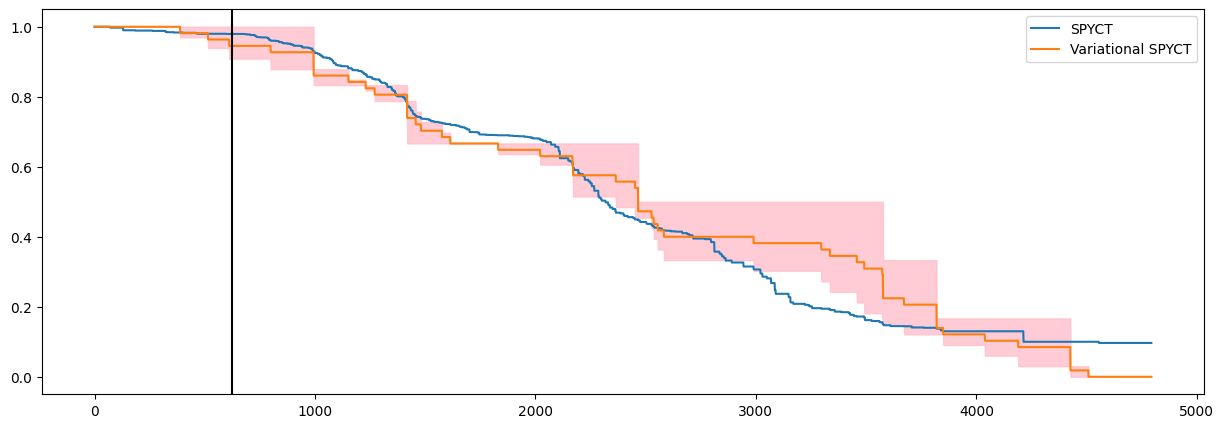

In [14]:
i = 47
plt.figure(figsize=(15,5))
plt.plot(preds_spyct[i, :], label='SPYCT')
plt.plot(preds[i, :, :].mean(axis=0), label='Variational SPYCT')

percentiles_10 = torch.quantile(preds[i, :, :], 0.1, axis=0)
percentiles_90 = torch.quantile(preds[i, :, :], 0.9, axis=0)

plt.fill_between(range(preds.shape[-1]), percentiles_10, percentiles_90, color='pink', alpha=0.8)

plt.axvline(sum(y_test[i].numpy()), color='black')

plt.legend()

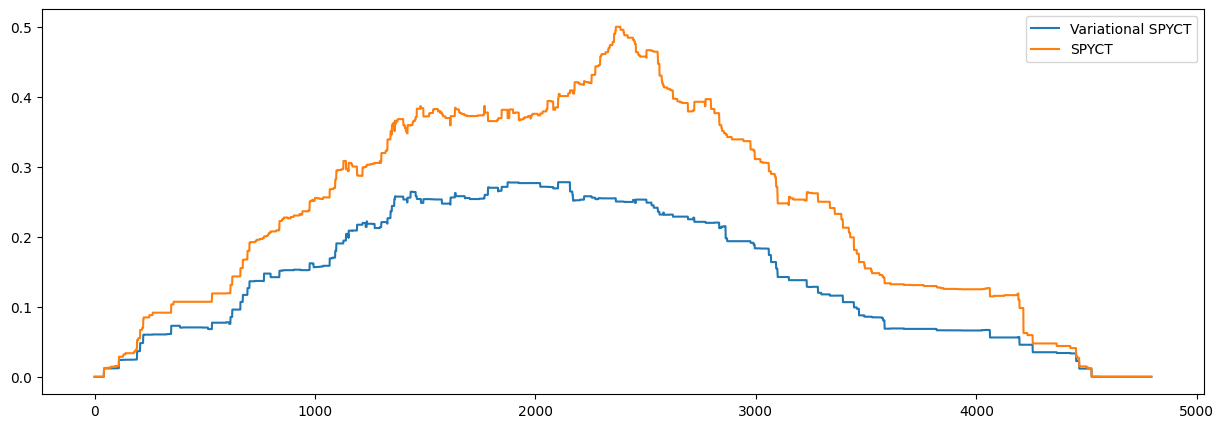

In [15]:
plot_brier(preds, preds_spyct_onetree, y_test)

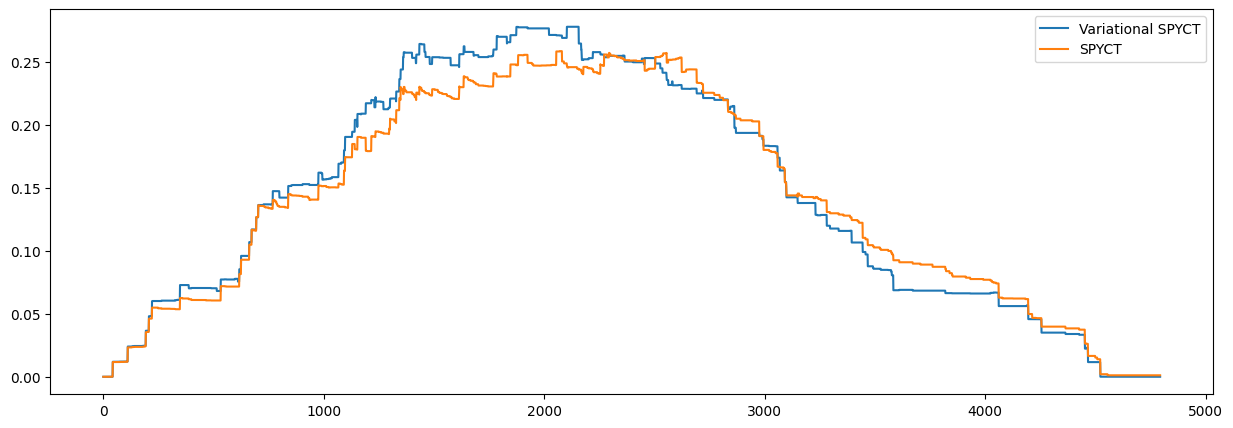

In [16]:
plot_brier(preds, preds_spyct, y_test)

In [17]:
X_train, T_train, E_train, X_test, T_test, E_test = data.pysurvival_split()

In [18]:
from pysurvival.models.semi_parametric import CoxPHModel

coxph = CoxPHModel()
coxph.fit(X_train, T_train, E_train, lr=0.01, l2_reg=1e-2, init_method='zeros')

Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 714.551 - ||grad||^2 = 404.22307
 * Iteration #2 - Loss = 698.182 - ||grad||^2 = 399.76632
 * Iteration #3 - Loss = 688.456 - ||grad||^2 = 395.63918
 * Iteration #4 - Loss = 679.989 - ||grad||^2 = 391.58569
 * Iteration #5 - Loss = 672.359 - ||grad||^2 = 387.59254
 * Iteration #6 - Loss = 665.347 - ||grad||^2 = 383.65324
 * Iteration #7 - Loss = 658.821 - ||grad||^2 = 379.76382
 * Iteration #8 - Loss = 652.692 - ||grad||^2 = 375.92157
 * Iteration #9 - Loss = 646.897 - ||grad||^2 = 372.12447
 * Iteration #10 - Loss = 641.387 - ||grad||^2 = 368.37093
 * Iteration #11 - Loss = 636.125 - ||grad||^2 = 364.65965
 * Iteration #12 - Loss = 631.082 - ||grad||^2 = 360.98954
 * Iteration #13 - Loss = 626.233 - ||grad||^2 = 357.35965
 * Iteration #14 - Loss = 621.560 - ||grad||^2 = 353.76914
 * Iteration #15 - Loss = 617.044 - ||grad||^2 = 350.21724
 * Iteration #16 - Loss = 612.672 - ||grad||^2 = 346.70326
 * Iteration #17 - Loss = 

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/pysurvival/models/semi_parametric.py:49: RuntimeWarning: divide by zero encountered in divide
  self.std_err  = np.sqrt(self.inv_Hessian.diagonal())/self.std_scale


CoxPHModel

In [19]:
times = coxph.times
print(times)

[  41.   51.   71.   77.   94.  110.  130.  131.  140.  179.  186.  191.
  198.  216.  223.  249.  264.  304.  321.  326.  334.  359.  388.  400.
  460.  466.  489.  515.  549.  552.  559.  597.  611.  681.  708.  727.
  733.  750.  762.  778.  785.  786.  790.  791.  797.  799.  824.  850.
  853.  859.  890.  904.  930.  935.  943.  971.  974.  980.  990.  999.
 1000. 1012. 1037. 1077. 1080. 1083. 1095. 1152. 1165. 1168. 1170. 1191.
 1197. 1212. 1217. 1350. 1356. 1413. 1427. 1434. 1444. 1462. 1478. 1487.
 1518. 1536. 1576. 1616. 1657. 1682. 1690. 1741. 1746. 1786. 1827. 1925.
 2011. 2071. 2090. 2105. 2111. 2224. 2256. 2286. 2288. 2297. 2386. 2400.
 2419. 2466. 2503. 2540. 2583. 2598. 2689. 2769. 2796. 2812. 2847. 3086.
 3090. 3170. 3222. 3244. 3358. 3428. 3445. 3561. 3574. 3762. 3839. 3853.
 4079. 4191.]


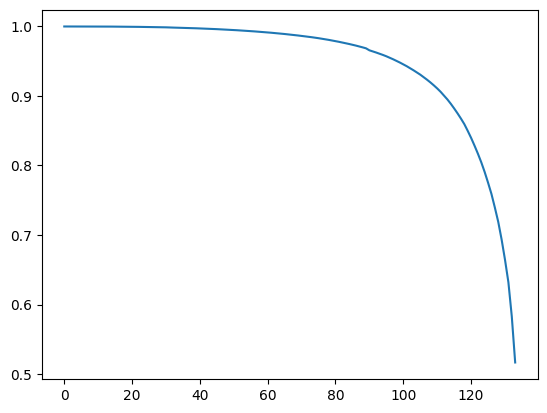

In [20]:
predicted = coxph.predict_survival(X_test)
plt.plot(predicted[5])

In [21]:
transformed_predictions = fix_predictions(predicted, times, int(T_train.max()))
transformed_predictions.shape

(84, 4795)

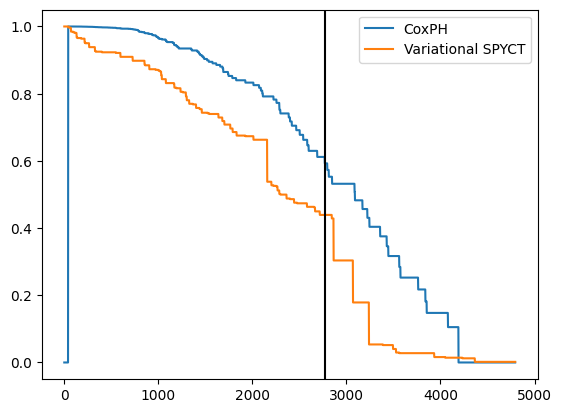

In [22]:
i = 30
plt.plot(transformed_predictions[i], label='CoxPH')
plt.plot(preds[i].mean(axis=0), label='Variational SPYCT')
plt.axvline(T_test[i], color='k')
plt.legend()

In [23]:
bs_test = calculate_bs((transformed_predictions, y_test))

In [24]:
bs_test2 = calculate_bs((preds.mean(axis=1), y_test))

In [25]:
bs_test3 = calculate_bs((preds_spyct, y_test))

In [26]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel

rsf = RandomSurvivalForestModel(num_trees=50)
rsf.fit(X_train, T_train, E_train, max_features="sqrt", max_depth=5)

RandomSurvivalForestModel

In [27]:
predicted_rsf = rsf.predict_survival(X_test)
transformed_predictions_rsf = fix_predictions(predicted_rsf, rsf.times, int(T_train.max()))

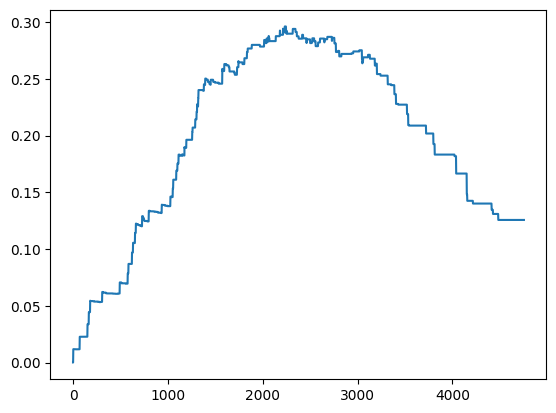

In [61]:
bs_test_rsf = calculate_bs((transformed_predictions_rsf, y_test))
plt.plot(bs_test_rsf[41:], label='Random Survival Forest')

In [62]:
from pysurvival.models.multi_task import LinearMultiTaskModel

In [66]:
mtlr = LinearMultiTaskModel()
mtlr.fit(X_train, T_train, E_train, lr=0.0001, l2_reg=1e-2, init_method='zeros')

% Completion: 100%|***********************************************|Loss:  38.03


LinearMultiTaskModel

In [73]:
predicted_mtlr = mtlr.predict_survival(X_test)
transformed_predictions_mtlr = fix_predictions(predicted_mtlr, mtlr.times, int(T_train.max()))
for i in range(transformed_predictions_mtlr.shape[0]):
    for j in range(transformed_predictions_mtlr.shape[1]):
        if transformed_predictions_mtlr[i, j] < 0:
            transformed_predictions_mtlr[i, j] = 0
        if transformed_predictions_mtlr[i, j] > 1:
            transformed_predictions_mtlr[i, j] = 1

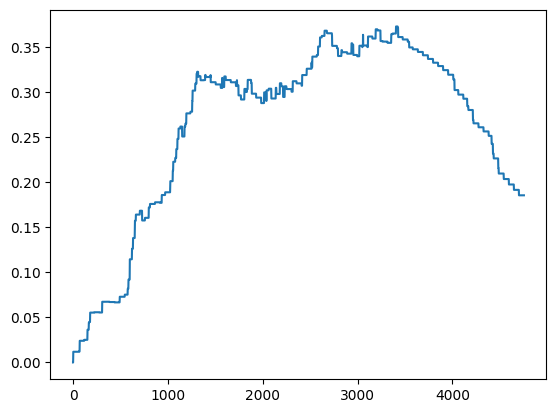

In [74]:
bs_test_mtlr = calculate_bs((transformed_predictions_mtlr, y_test))
plt.plot(bs_test_mtlr[41:], label='Multi-task Linear Regression')

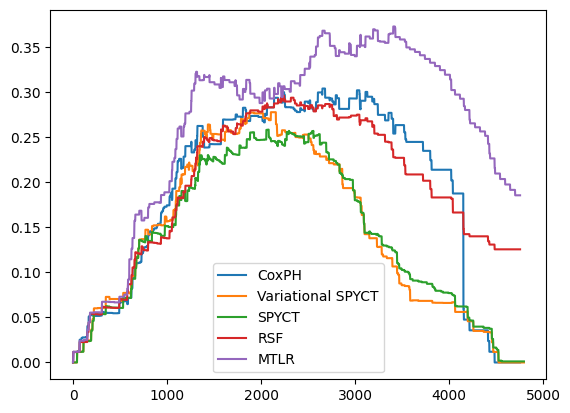

In [75]:
plt.plot(bs_test[41:], label='CoxPH')
plt.plot(bs_test2, label='Variational SPYCT')
plt.plot(bs_test3, label='SPYCT')
plt.plot(bs_test_rsf[41:], label='RSF')
plt.plot(bs_test_mtlr[41:], label='MTLR')
plt.legend()

In [38]:
print(bs_test_rsf[41:].max(),
bs_test[41:].max(),
bs_test2.max(),
bs_test3.max())

0.2962022682302296 0.30426168668191494 0.27796417 0.25860468


In [49]:
from pysurvival.utils.metrics import brier_score
example_bs = brier_score(rsf, X_test, T_test, E_test, t_max=None)
plt.plot(example_bs[1])

325

In [79]:
np.array(example_bs[1]).shape

(325,)

In [87]:
np.expand_dims(example_bs[1], axis=0).shape[1]-1

324

In [90]:
example_bs[1]

[4.698363758397175e-05,
 0.011691126435565158,
 0.011641805042581001,
 0.011629971030033975,
 0.011657219246493766,
 0.011695229783074633,
 0.022621996260493764,
 0.022613568978691156,
 0.022659912764153505,
 0.022691065498774643,
 0.022721514256587486,
 0.02279607602367885,
 0.03376128362831336,
 0.044277441210791815,
 0.054114864166891354,
 0.05386264163013994,
 0.05356858974774874,
 0.05332322851293739,
 0.05324234768751295,
 0.053359384271310796,
 0.05323951855486332,
 0.061296156569466,
 0.06094565442242097,
 0.060803668768502,
 0.06075502010367258,
 0.06067420155673442,
 0.060755781110953005,
 0.06073145890671243,
 0.06036828539513404,
 0.060292152154911294,
 0.060243381739315226,
 0.06037067168231339,
 0.060514717229108145,
 0.08781985642739504,
 0.08777622064118441,
 0.10483234921194458,
 0.10456494622124675,
 0.10455657962327379,
 0.10455312204115215,
 0.10431014453496514,
 0.10399313911465911,
 0.10351586620520034,
 0.11172309402374274,
 0.11112046026946977,
 0.11093602372782

In [55]:
predicted_rsf.shape

(84, 327)

In [59]:
example_bs[1]

[4.698363758397175e-05,
 0.011691126435565158,
 0.011641805042581001,
 0.011629971030033975,
 0.011657219246493766,
 0.011695229783074633,
 0.022621996260493764,
 0.022613568978691156,
 0.022659912764153505,
 0.022691065498774643,
 0.022721514256587486,
 0.02279607602367885,
 0.03376128362831336,
 0.044277441210791815,
 0.054114864166891354,
 0.05386264163013994,
 0.05356858974774874,
 0.05332322851293739,
 0.05324234768751295,
 0.053359384271310796,
 0.05323951855486332,
 0.061296156569466,
 0.06094565442242097,
 0.060803668768502,
 0.06075502010367258,
 0.06067420155673442,
 0.060755781110953005,
 0.06073145890671243,
 0.06036828539513404,
 0.060292152154911294,
 0.060243381739315226,
 0.06037067168231339,
 0.060514717229108145,
 0.08781985642739504,
 0.08777622064118441,
 0.10483234921194458,
 0.10456494622124675,
 0.10455657962327379,
 0.10455312204115215,
 0.10431014453496514,
 0.10399313911465911,
 0.10351586620520034,
 0.11172309402374274,
 0.11112046026946977,
 0.11093602372782